In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel(r"data/creditcardmarketing.xlsx")

In [3]:
df.head(5)

,Customer Number,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


In [4]:
df.drop('Customer Number', axis=1, inplace=True)

In [5]:
df.describe()

,# Bank Accounts Open,# Credit Cards Held,# Homes Owned,Household Size,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
count,18000.000000,18000.000000,18000.000000,18000.000000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000
mean,1.255778,1.903500,1.203444,3.499056,940.515562,910.450656,999.392190,1042.033600,810.185803
std,0.472501,0.797009,0.427341,1.114182,350.297837,620.077060,457.402268,553.452599,559.001365
min,1.000000,1.000000,1.000000,1.000000,48.250000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,3.000000,787.500000,392.750000,663.000000,633.000000,363.000000
50%,1.000000,2.000000,1.000000,3.000000,1007.000000,772.000000,1032.000000,945.500000,703.000000
75%,1.000000,2.000000,1.000000,4.000000,1153.250000,1521.000000,1342.000000,1463.000000,1212.000000
max,3.000000,4.000000,3.000000,9.000000,3366.250000,3450.000000,3421.000000,3823.000000,4215.000000


In [6]:
df.shape

(18000, 16)

In [7]:
df.isnull().sum()

Offer Accepted           0
Reward                   0
Mailer Type              0
Income Level             0
# Bank Accounts Open     0
Overdraft Protection     0
Credit Rating            0
# Credit Cards Held      0
# Homes Owned            0
Household Size           0
Own Your Home            0
Average Balance         24
Q1 Balance              24
Q2 Balance              24
Q3 Balance              24
Q4 Balance              24
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.duplicated().sum()

0

In [10]:
df.shape

(17976, 16)

In [11]:
len(df[df['Offer Accepted'] == 'No'])

16955

In [12]:
df_offer = df.copy()

In [13]:
df_offer.shape

(17976, 16)

In [14]:
df_offer.dtypes

Offer Accepted           object
Reward                   object
Mailer Type              object
Income Level             object
# Bank Accounts Open      int64
Overdraft Protection     object
Credit Rating            object
# Credit Cards Held       int64
# Homes Owned             int64
Household Size            int64
Own Your Home            object
Average Balance         float64
Q1 Balance              float64
Q2 Balance              float64
Q3 Balance              float64
Q4 Balance              float64
dtype: object

# Offer yes

In [15]:
df_offer_yes = df_offer[df_offer['Offer Accepted'] == 'Yes']

In [16]:
df_offer_yes.describe()

,# Bank Accounts Open,# Credit Cards Held,# Homes Owned,Household Size,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
count,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000
mean,1.252693,1.897160,1.202742,3.440744,934.980167,868.670911,998.813908,1060.929481,811.506366
std,0.461036,0.806956,0.423608,1.126188,348.586313,621.091927,463.188441,567.424601,548.032407
min,1.000000,1.000000,1.000000,1.000000,75.750000,2.000000,8.000000,11.000000,4.000000
25%,1.000000,1.000000,1.000000,3.000000,800.500000,359.000000,652.000000,630.000000,389.000000
50%,1.000000,2.000000,1.000000,3.000000,1008.500000,721.000000,1051.000000,964.000000,703.000000
75%,1.000000,2.000000,1.000000,4.000000,1151.000000,1479.000000,1347.000000,1527.000000,1198.000000
max,3.000000,4.000000,3.000000,9.000000,1879.250000,2189.000000,1995.000000,2292.000000,2197.000000


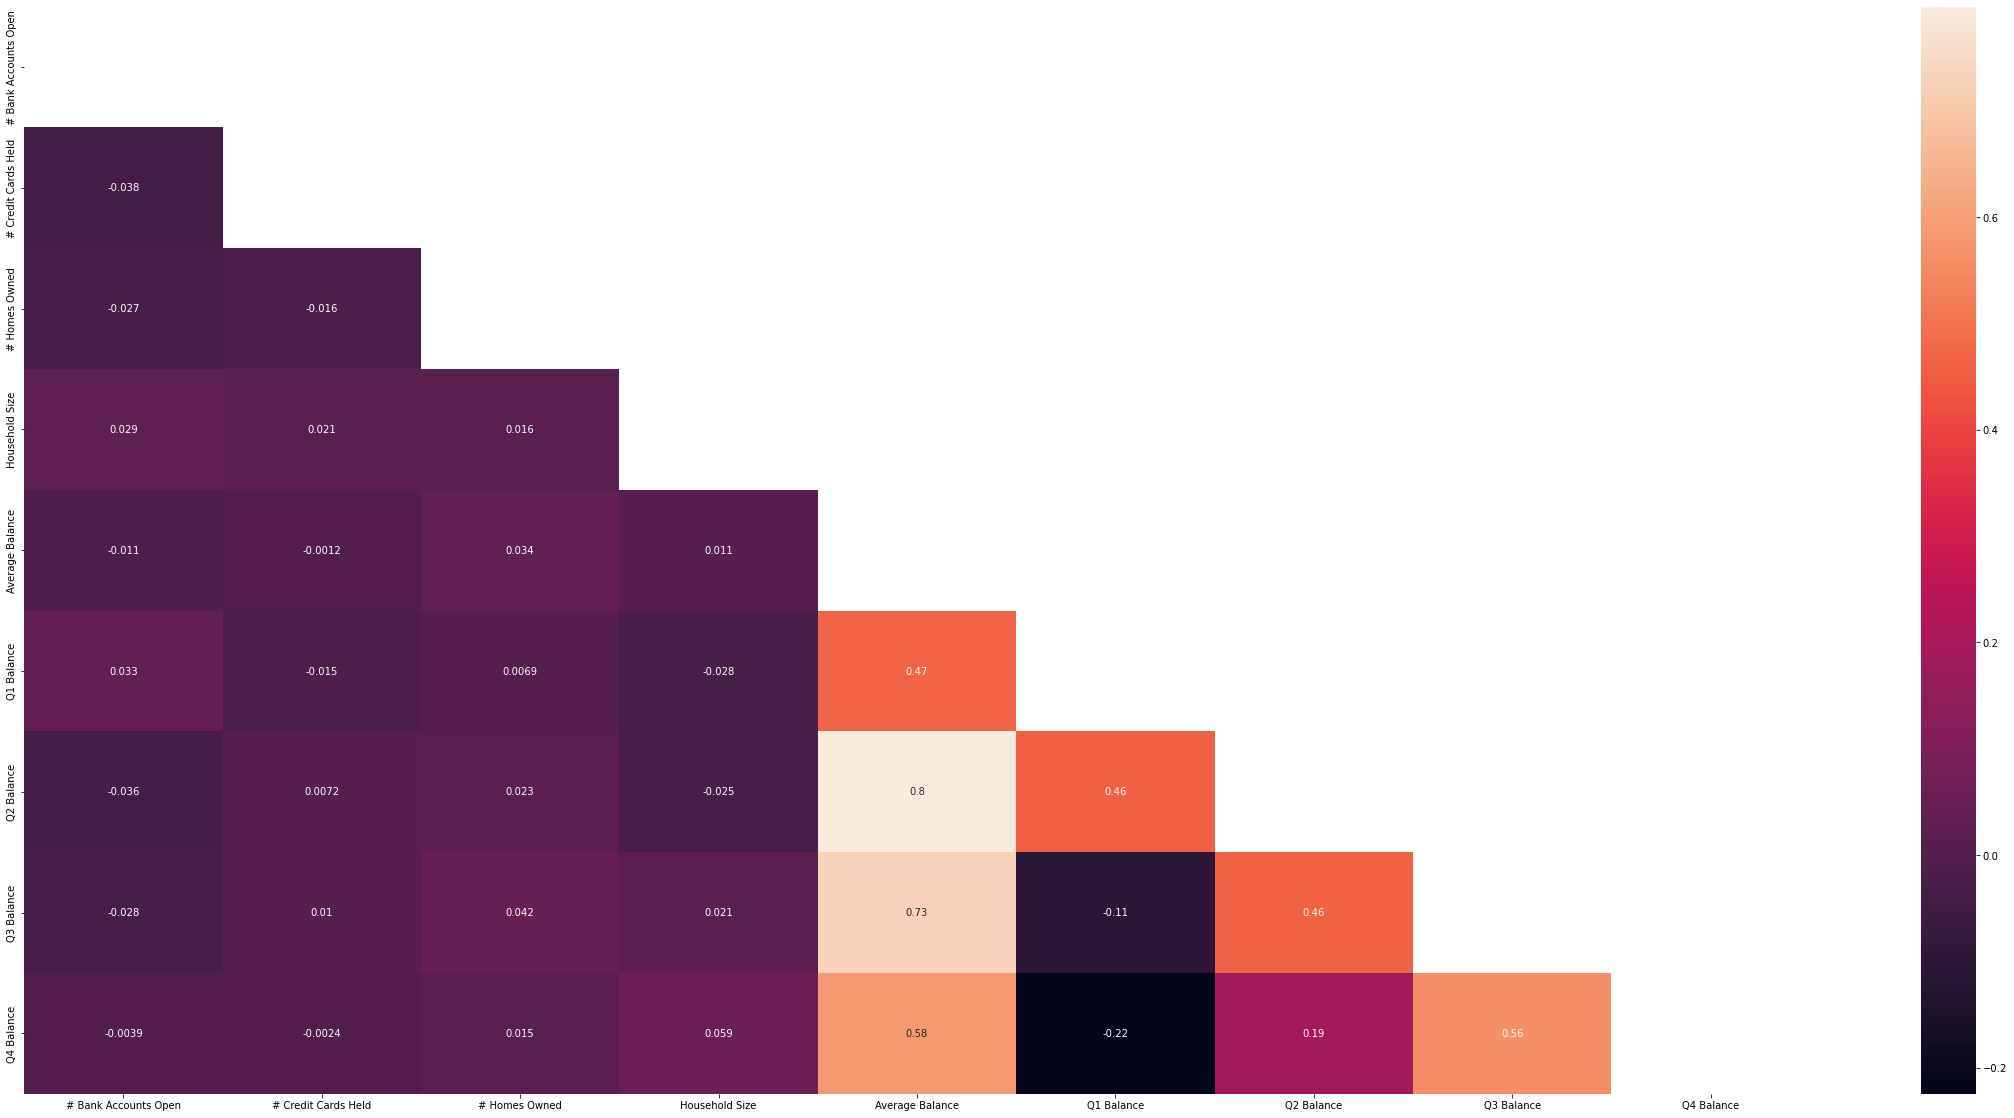

In [17]:
mask = np.triu(np.ones_like(df_offer_yes.corr(), dtype=bool))

fig, ax = plt.subplots(figsize = (40,20))
sns.heatmap(df_offer_yes.corr(), annot = True, mask = mask)
plt.size = (40,40)
plt.show()

As we could expect, Q1, Q2, Q3 and Q4 have a strong correlation with the Average balance, so we'll drop them.

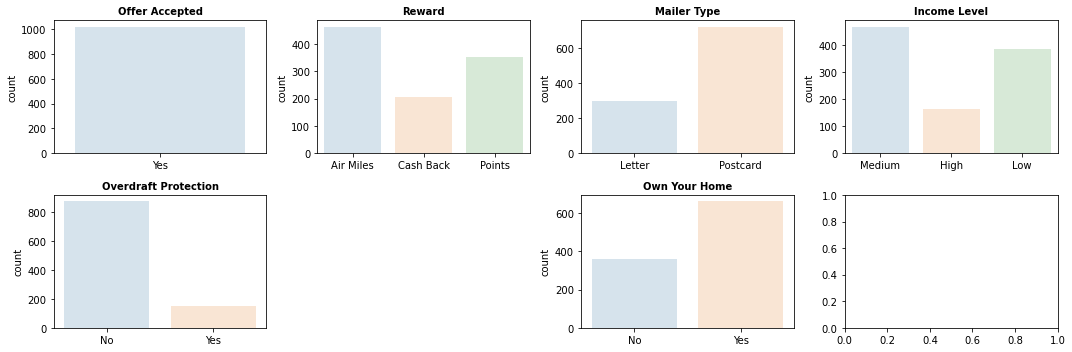

In [18]:
fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (15, 5))


axes = axes.flat

columnas_cat = df_offer_yes.select_dtypes(include = "object").columns

for i, colum in enumerate(columnas_cat): 
    sns.countplot(
        data = df_offer_yes,
        x = colum,
        #hue= 'Offer Accepted',
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 10)
    axes[i].set_xlabel("")

fig.delaxes(axes[5])
fig.tight_layout();

In [19]:
for i in df_offer_yes['Credit Rating'].unique():
    print(i, len(df_offer_yes[df_offer_yes['Credit Rating']==i]));

Low 633
High 119
Medium 269


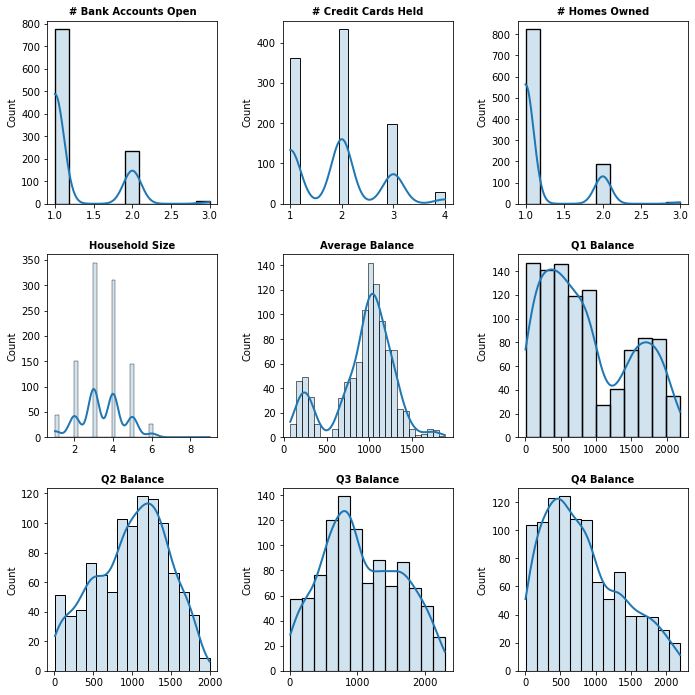

In [20]:
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (10, 10))


axes = axes.flat

columnas_cat = df_offer_yes.select_dtypes(include = "number").columns

for i, colum in enumerate(columnas_cat):
    sns.set_context("talk")
    sns.histplot(
        data = df_offer_yes,
        x = colum,
        kde = True,  
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 10)
    axes[i].set_xlabel("")


fig.tight_layout();

In the previous charts we can see that:
- Reward: Air miles and Points work better than Cash Back
- Mailer type: Postcard is better than letter
- Income level: Medium and Low more than High
- Overdraft protection: No way more common than Yes
- Credit Rating: High and Medium more than Low
- Own home: Yes is more common than No
- Bank accounts: the majority have 1
- Credit cards: the majority have 1 or 2
- Homes owned: the majority have 1
- House hold size: 3 and 4 are the most common values
- Average balance: it's around 1000

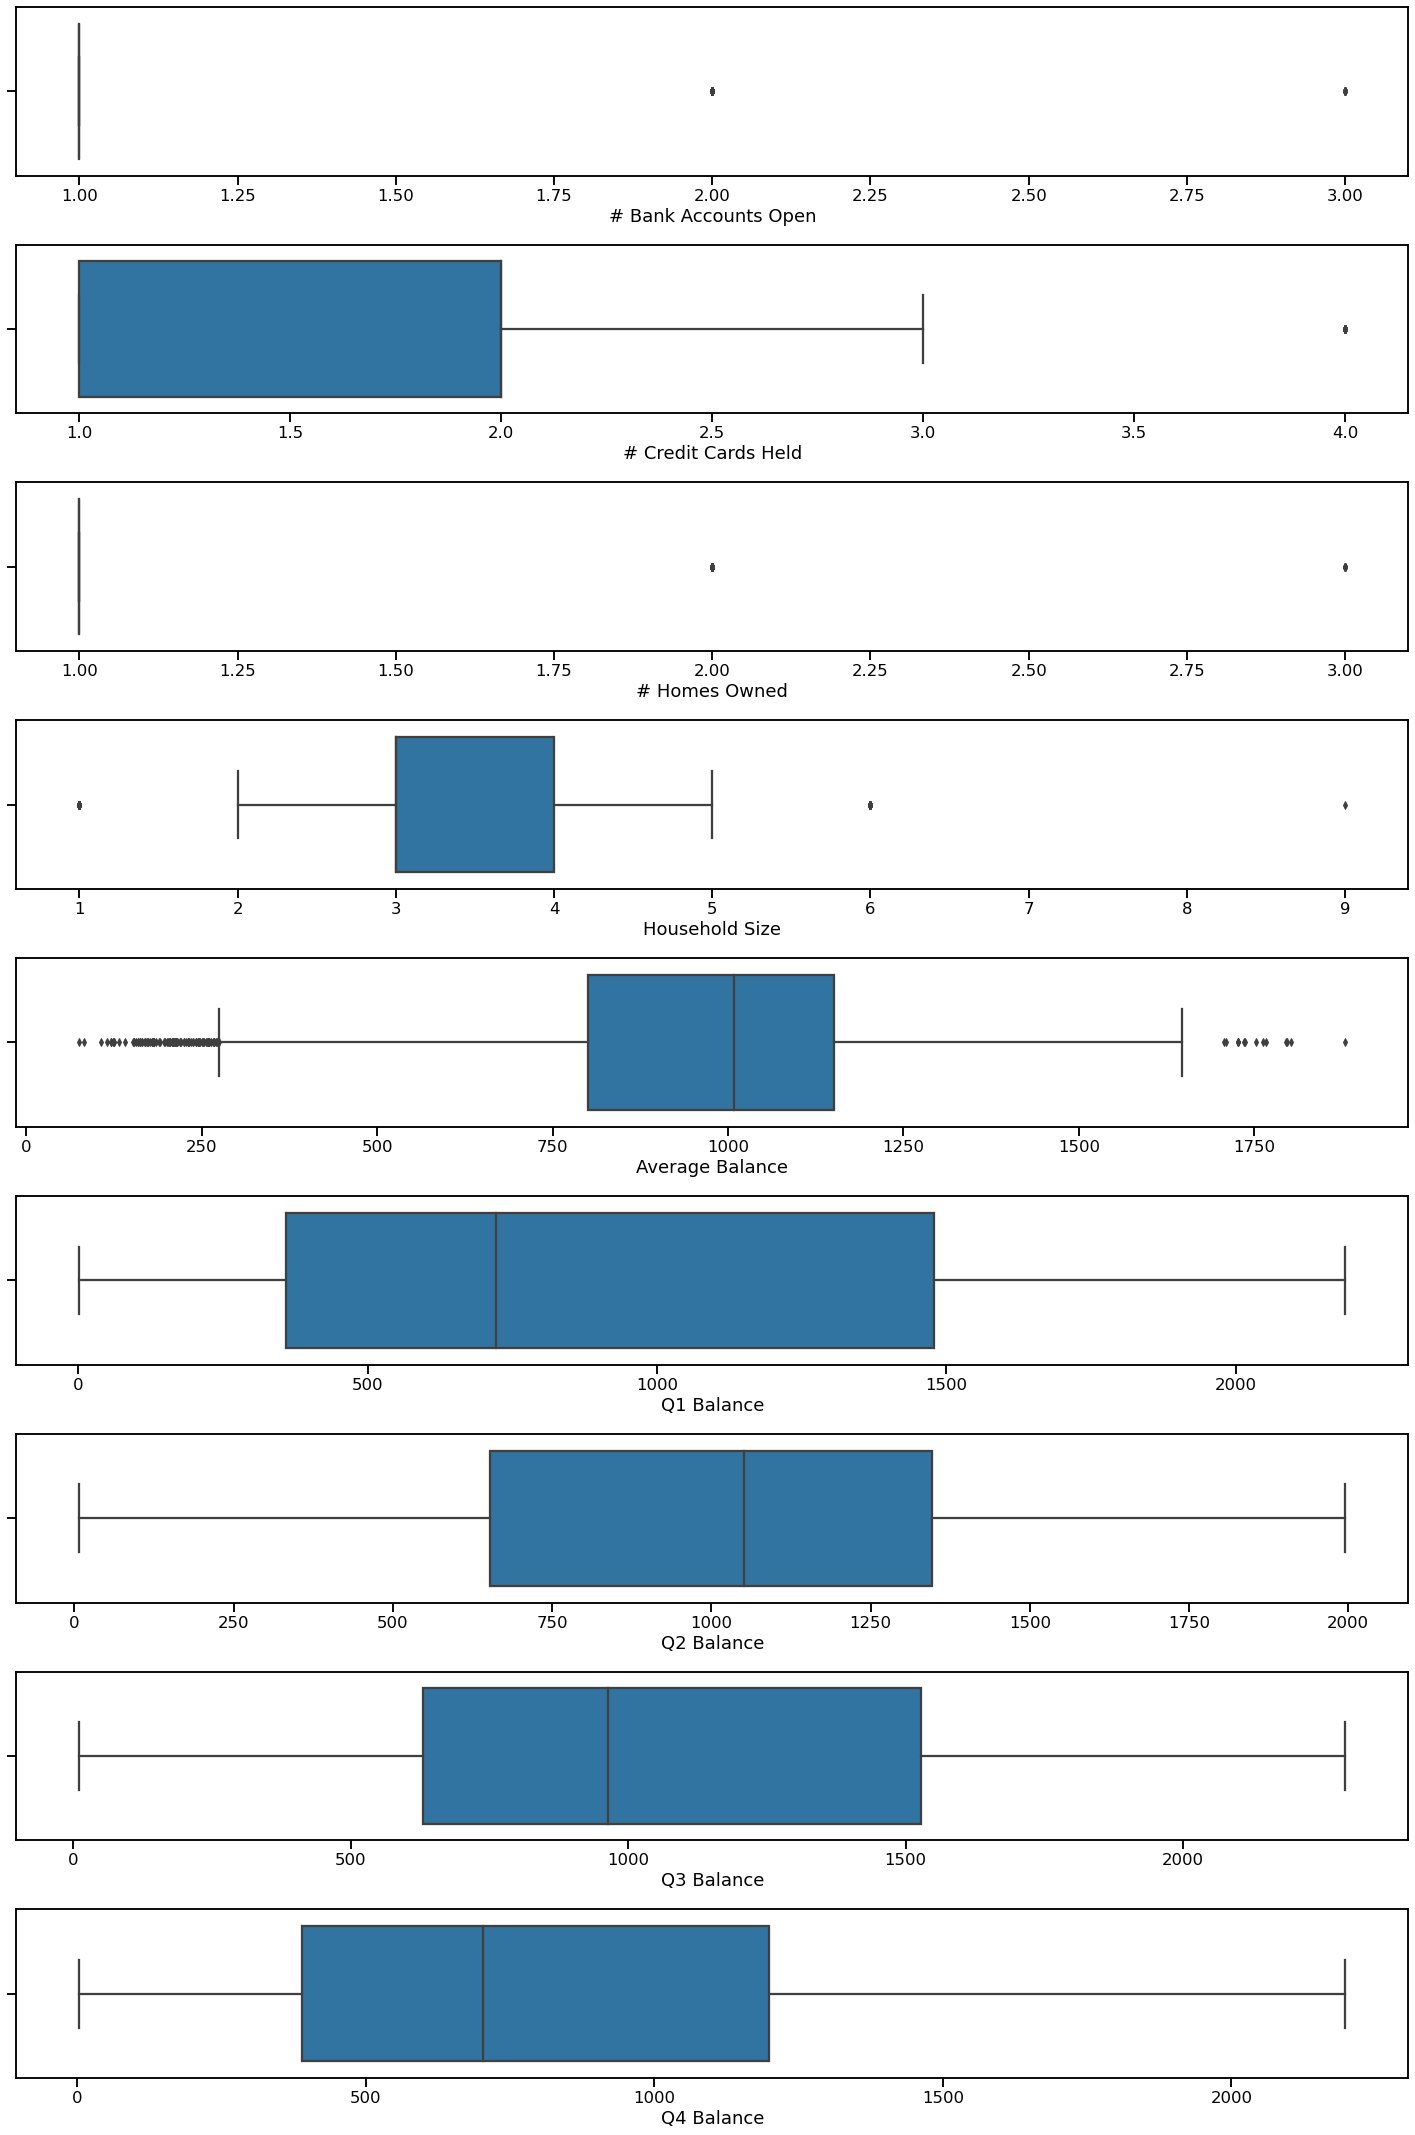

In [21]:
fig, ax = plt.subplots(9, 1, figsize=(20,30))

for i in range(len(df_offer_yes.select_dtypes(include = "number").columns)):
    sns.boxplot(x=df_offer_yes.select_dtypes(include = "number").columns[i], data=df_offer_yes, ax=ax[i])
plt.tight_layout()
plt.show()

In [22]:
def outliers(df, col):
    """
    Calculates the interquartile range of a column in a dataframe.
    
    Args:
        df (pandas Data Frame)
        col (string): name of the column
    Returns:
        q1: value of the first quartile
        q2: value of the second quartile
        outlier_iqr: interquartile range
    """
    q1 = np.nanpercentile(df[col], 25)
    q3 = np.nanpercentile(df[col], 75)
    iqr = q3 - q1
    outlier_step = 1.5 * iqr
    return q1, q3, outlier_step

def outliers_df(df, col):
    """
    Separates the outliers of a column in a dataframe.
    
    Args:
        df (pandas Data Frame)
        col (string): name of the column
    Methods:
        Uses the function outliers()
    Returns:
        outliers_data: dataframe with the outliers
    """
    outliers_data = df[(df[col] < outliers(df, col)[0] - outliers(df, col)[2]) | (df[col] > outliers(df, col)[1] + outliers(df, col)[2])]
    return outliers_data

def outliers_index(df, list_col):
    """
    Creates a list and a dictionary with the indexes of the outliers of a list of columns in a dataframe.
    
    Args:
        df (pandas Data Frame)
        list_col (list): list of strings with the names of the columns
    Methods:
        Uses the function outliers_df()
    Returns:
        dicc_index: dictionary with the name of the columns as keys and the indexes of the outliers as values
        outliers: list with the indexes of the outliers
    """
    dicc_index = {}
    for i in list_col:
        if outliers_df(df, i).shape[0] > 0:
            dicc_index[i] = list(outliers_df(df, i).index)
    outliers = list(set([i for sublist in list(dicc_index.values()) for i in sublist]))
    return dicc_index, outliers

In [23]:
outliers_dict_yes = outliers_index(df_offer_yes.select_dtypes(include = "number"), df_offer_yes.select_dtypes(include = "number").columns)[0]

In [24]:
df_offer_yes.shape

(1021, 16)

In [25]:
for i, k in outliers_dict_yes.items():
    print(i, len(k))

# Bank Accounts Open 246
# Credit Cards Held 29
# Homes Owned 198
Household Size 71
Average Balance 116


### Outliers for Yes
- We'll drop the outliers for Credit Cards Held.
- Bank Accounts Open, Homes Owned and Average Balance have exactly the same behavior for Yes and No, as we'll in the following charts, so the full columns will be dropped.
- Household Size seems to have a relevance for Yes, but it's not clear if it's a good feature, so we'll keep it for the moment.

# Offer no

In [26]:
df_offer_no = df[df['Offer Accepted'] == 'No']

In [27]:
df_offer_yes.describe()

,# Bank Accounts Open,# Credit Cards Held,# Homes Owned,Household Size,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
count,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000
mean,1.252693,1.897160,1.202742,3.440744,934.980167,868.670911,998.813908,1060.929481,811.506366
std,0.461036,0.806956,0.423608,1.126188,348.586313,621.091927,463.188441,567.424601,548.032407
min,1.000000,1.000000,1.000000,1.000000,75.750000,2.000000,8.000000,11.000000,4.000000
25%,1.000000,1.000000,1.000000,3.000000,800.500000,359.000000,652.000000,630.000000,389.000000
50%,1.000000,2.000000,1.000000,3.000000,1008.500000,721.000000,1051.000000,964.000000,703.000000
75%,1.000000,2.000000,1.000000,4.000000,1151.000000,1479.000000,1347.000000,1527.000000,1198.000000
max,3.000000,4.000000,3.000000,9.000000,1879.250000,2189.000000,1995.000000,2292.000000,2197.000000


In [28]:
df_offer_no.shape

(16955, 16)

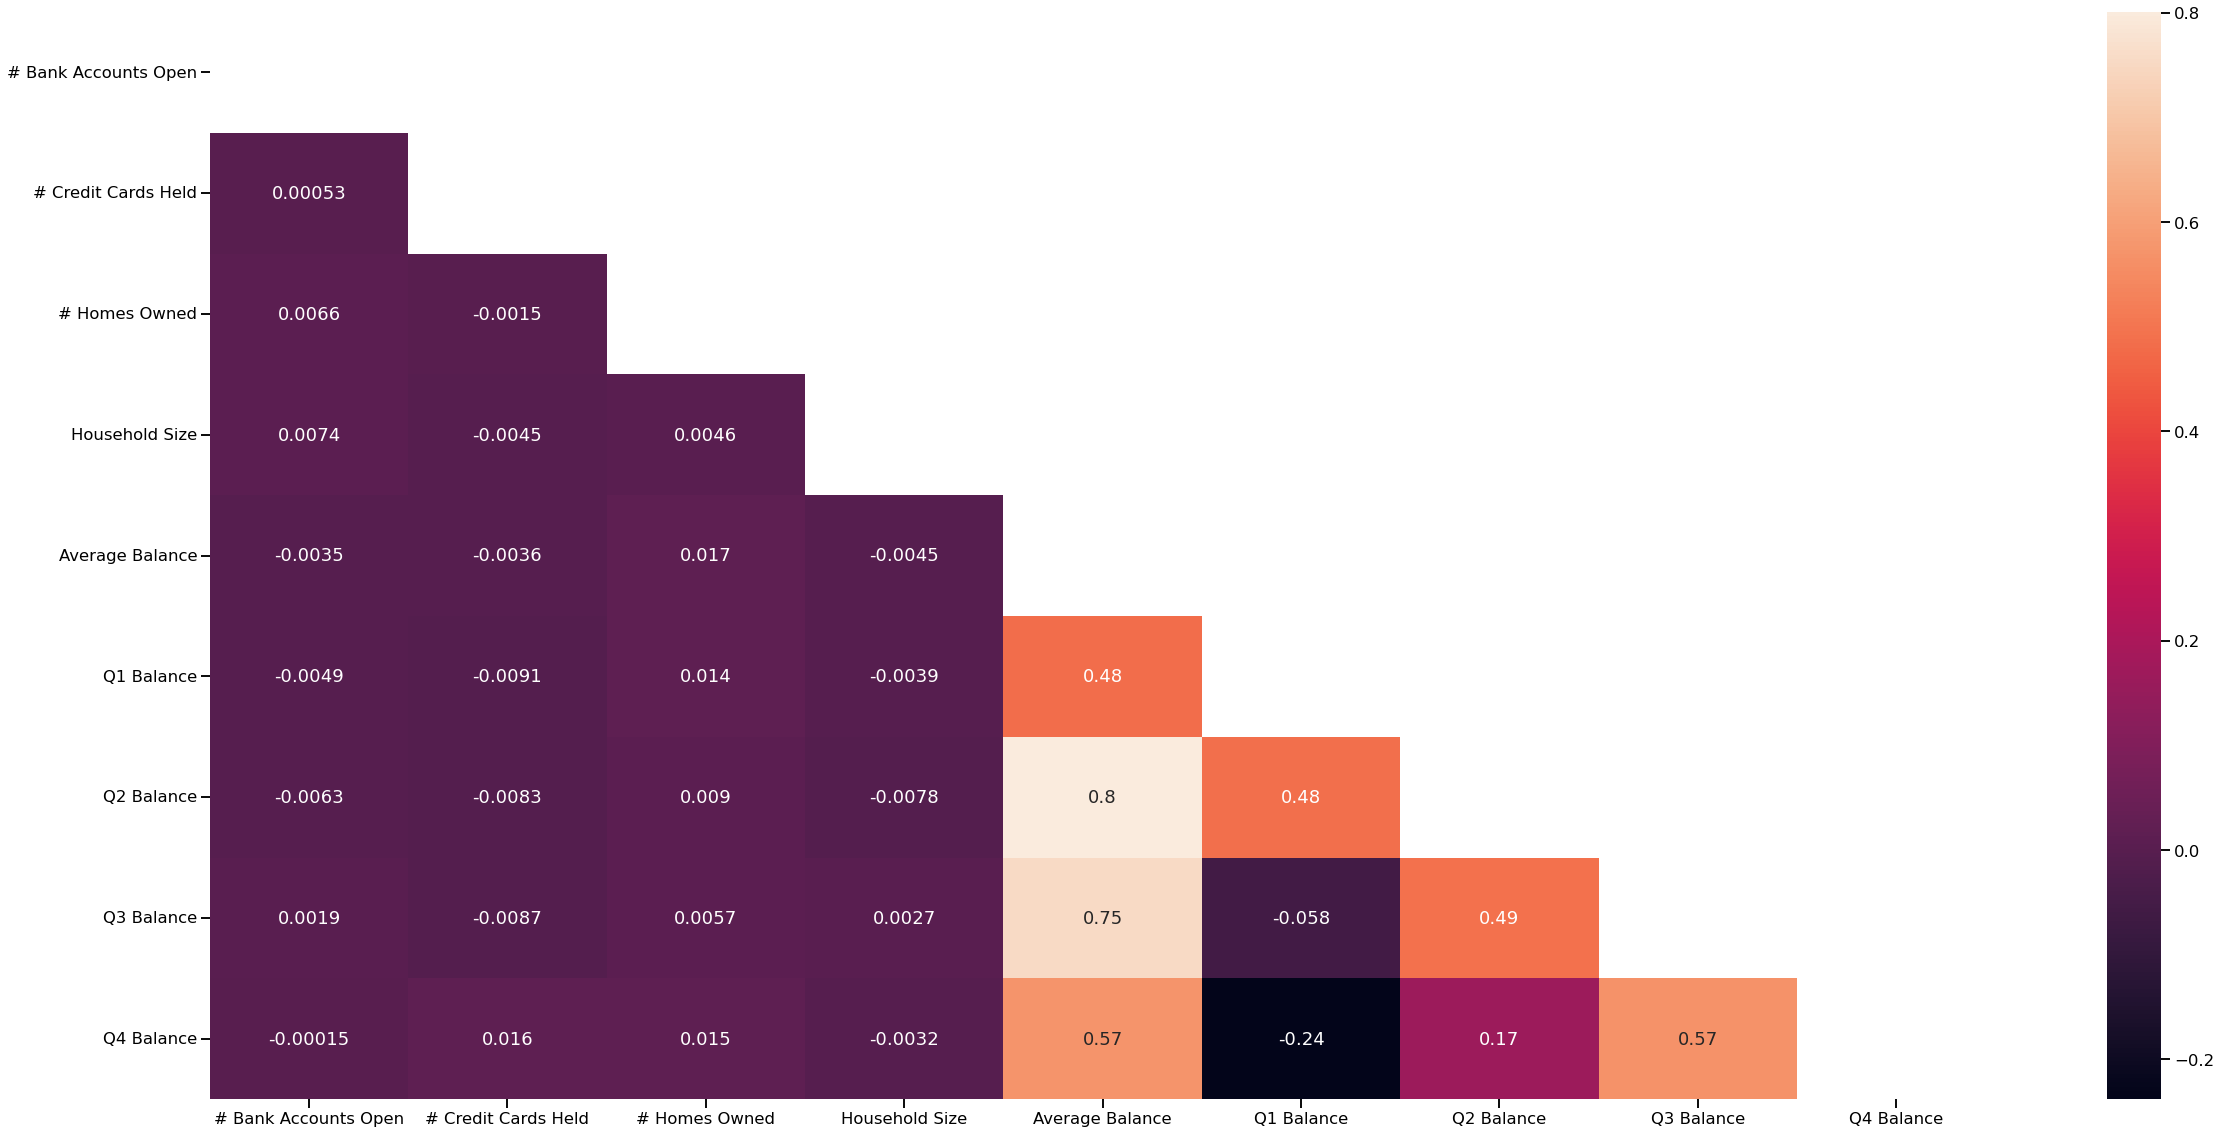

In [29]:
mask = np.triu(np.ones_like(df_offer_no.corr(), dtype=bool))

fig, ax = plt.subplots(figsize = (40,20))
sns.heatmap(df_offer_no.corr(), annot = True, mask = mask)
plt.size = (40,40)
plt.show()

As we could expect, Q1, Q2, Q3 and Q4 have a strong correlation with the Average balance, so we'll drop them.

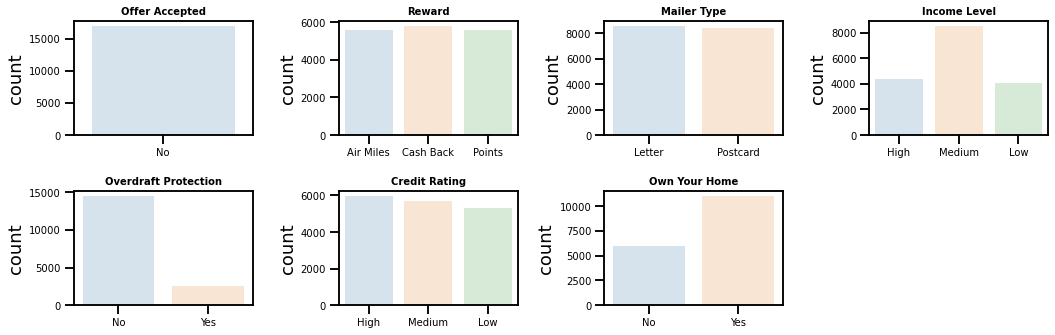

In [30]:
fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (15, 5))


axes = axes.flat

columnas_cat = df_offer_no.select_dtypes(include = "object").columns

for i, colum in enumerate(columnas_cat): 
    sns.countplot(
        data = df_offer_no,
        x = colum,
        #hue= 'Offer Accepted',
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 10)
    axes[i].set_xlabel("")

fig.delaxes(axes[7])
fig.tight_layout();

In [31]:
for i in df_offer_no['Credit Rating'].unique():
    print(i, len(df_offer_no[df_offer_no['Credit Rating']==i]));

High 5945
Medium 5695
Low 5315


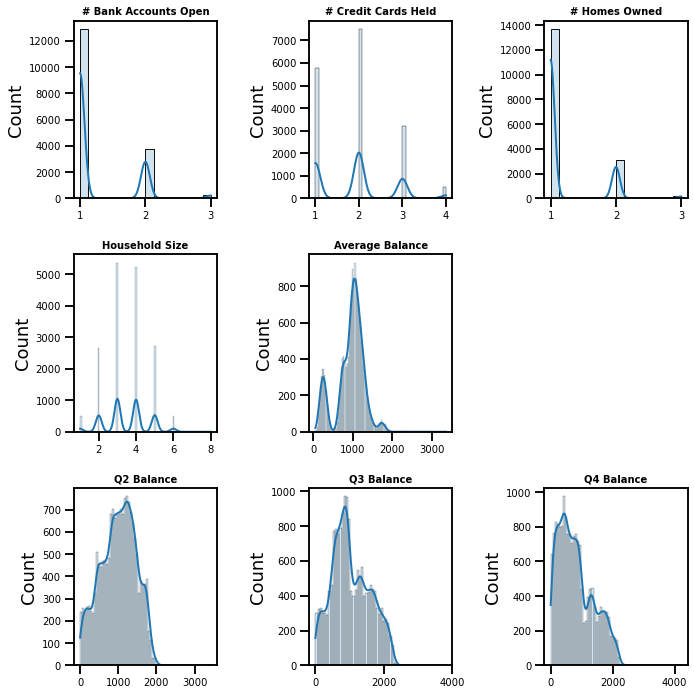

In [32]:
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (10, 10))


axes = axes.flat

columnas_cat = df_offer_no.select_dtypes(include = "number").columns

for i, colum in enumerate(columnas_cat):
    sns.set_context("talk")
    sns.histplot(
        data = df_offer_no,
        x = colum,
        kde = True,  
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 10)
    axes[i].set_xlabel("")

fig.delaxes(axes[5])
fig.tight_layout();

In the previous charts we can see that:
- In Reward and Mailer type all the options were equally rejected
- Income level: Medium is the most common and Low and High are equal
- Overdraft protection: No way more common than Yes
- Credit Rating: High, and Low are equally distributed
- Own home: Yes is more common than No
- Bank accounts: the majority have 1
- Credit cards: the majority have 2 or 1
- Homes owned: the majority have 1
- House hold size: 3 and 4 are the most common values
- Average balance: it's around 1000

In [33]:
outliers_dict_no = outliers_index(df_offer_no.select_dtypes(include = "number"), df_offer_no.select_dtypes(include = "number").columns)[0]

In [34]:
len(df_offer_no[df_offer_no['# Credit Cards Held'] == 4])

486

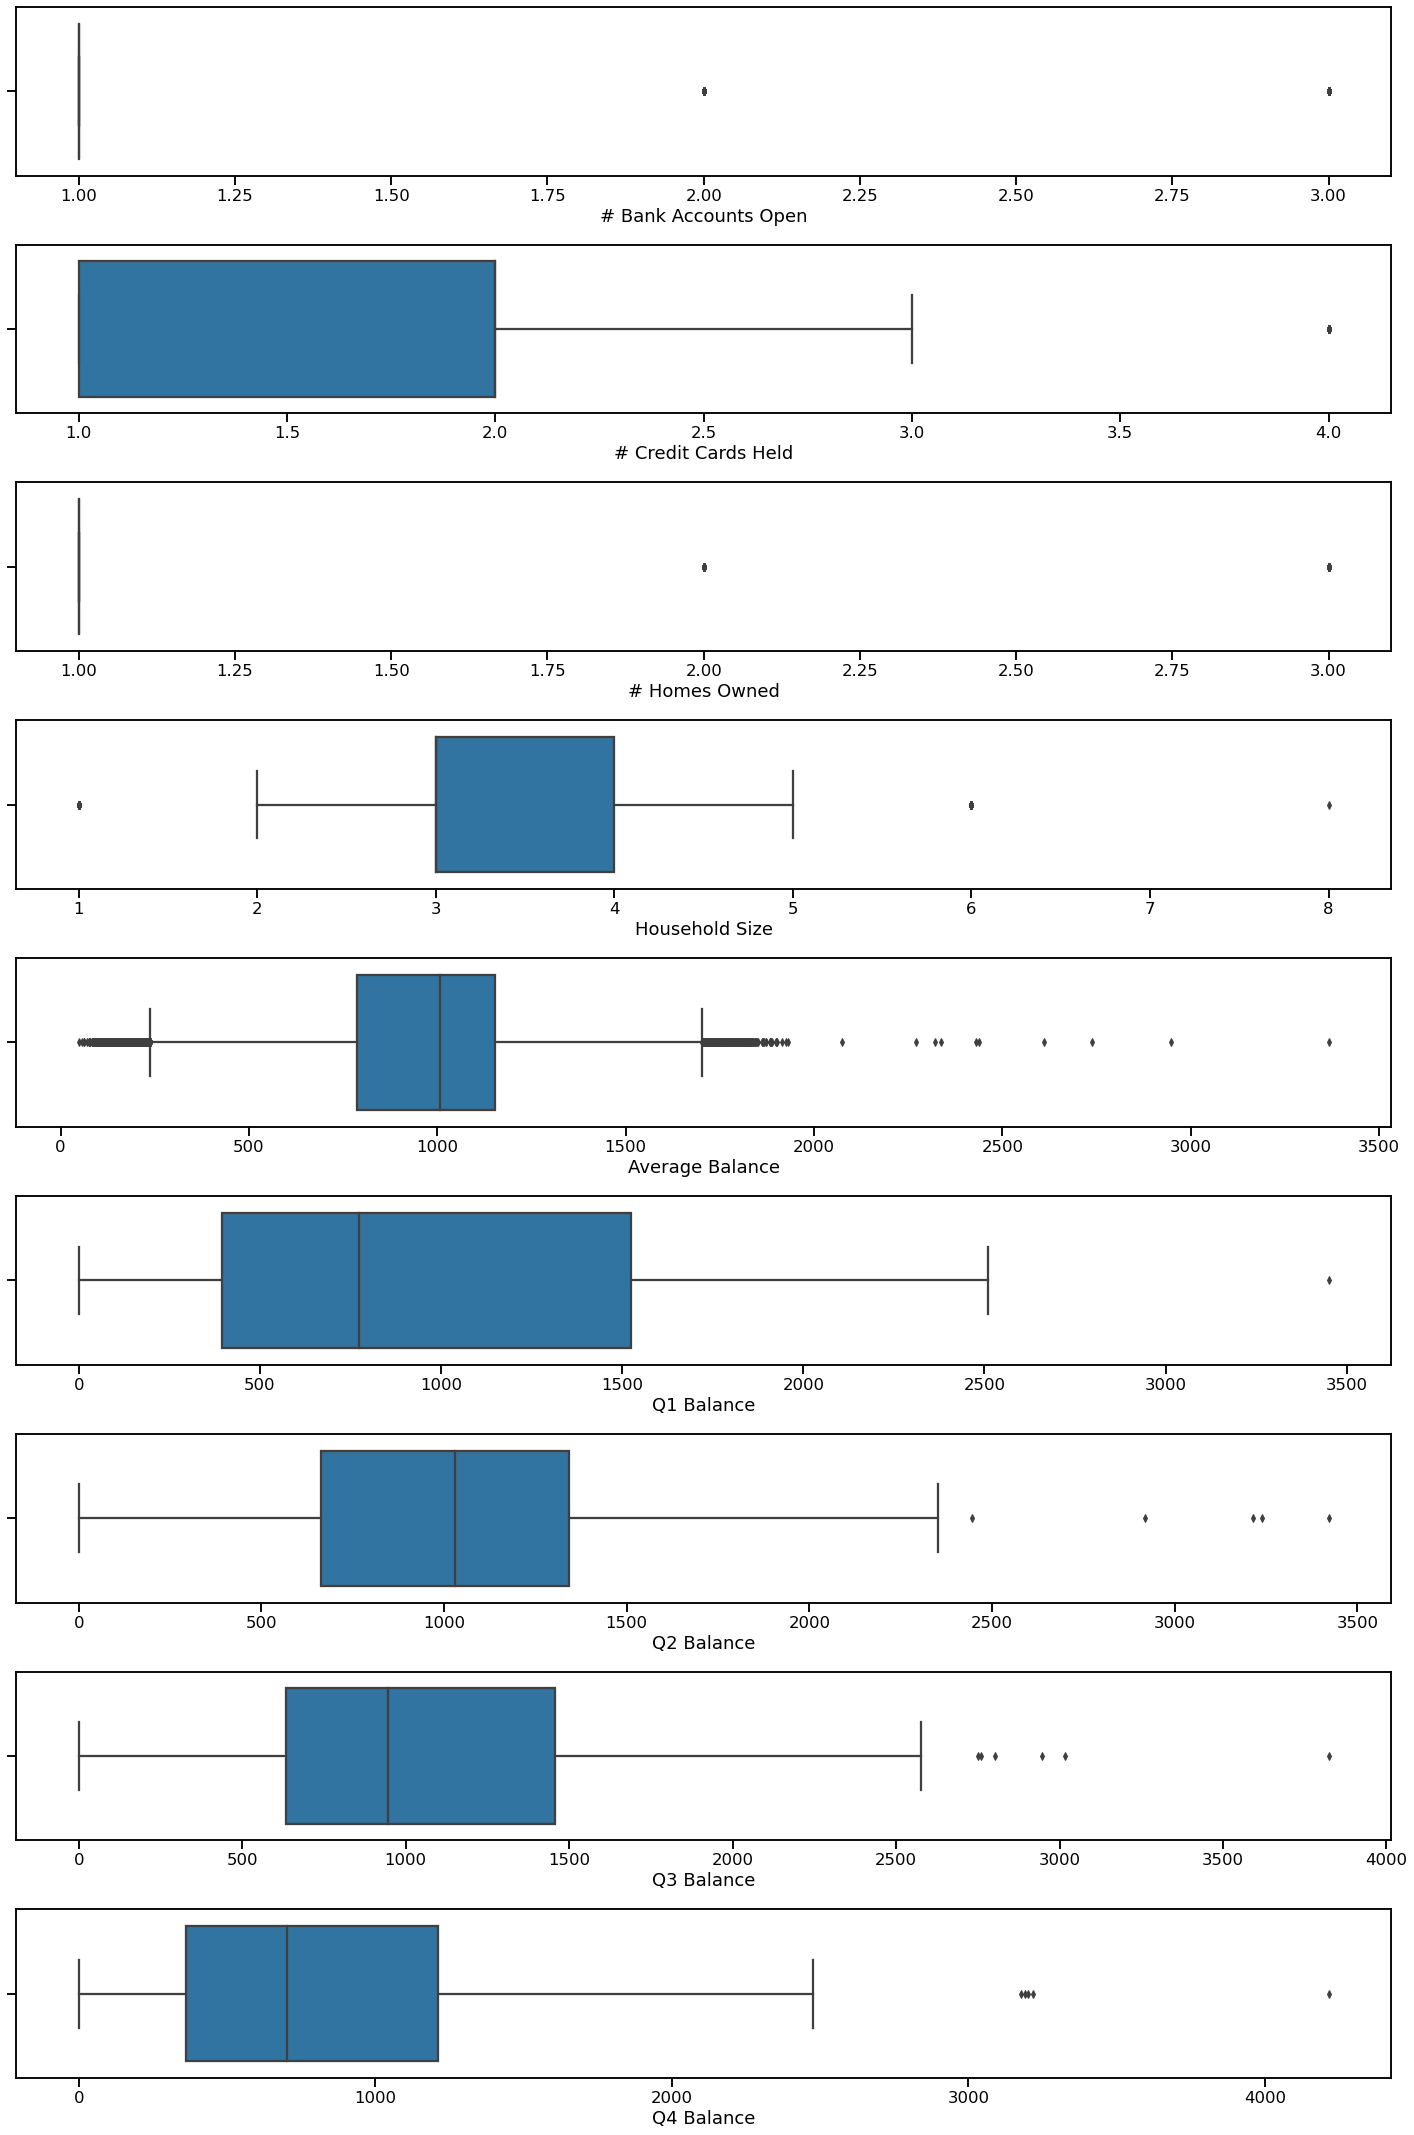

In [35]:
fig, ax = plt.subplots(9, 1, figsize=(20,30))

for i in range(len(df_offer_no.select_dtypes(include = "number").columns)):
    sns.boxplot(x=df_offer_no.select_dtypes(include = "number").columns[i], data=df_offer_no, ax=ax[i])
plt.tight_layout()
plt.show()

In [36]:
for i, k in outliers_dict_no.items():
    print(i, len(k))

# Bank Accounts Open 4056
# Credit Cards Held 486
# Homes Owned 3276
Household Size 1008
Average Balance 1331
Q1 Balance 1
Q2 Balance 5
Q3 Balance 6
Q4 Balance 5


### Outliers for No
- We'll drop the outliers for Credit Cards Held.
- Bank Accounts Open, Homes Owned and Average Balance have exactly the same behavior for Yes and No, as we've seen in the previous charts, so the full columns will be dropped.
- Household Size seems to have a relevance for Yes, but it's not clear if it's a good feature, so we'll keep it for the moment.

# Cleaning the data

The columns 'Q1 Balance', 'Q2 Balance', 'Q3 Balance', 'Q4 Balance' are correlated with the Average balance, so we'll drop them.
Also, columns '# Homes Owned', 'Average Balance', 'Overdraft Protection', '# Bank Accounts Open', 'Own Your Home' have exacctly the same behavior for Yes and No, so we'll drop them as they don't give any relevant information that help us to distinguish both groups.

## Yes

In [37]:
df_offer_yes_clean = df_offer_yes.drop(outliers_dict_yes['# Credit Cards Held'], axis = 0)

In [38]:
# df_offer_yes_clean = df_offer_yes_clean.drop(['Q1 Balance', 'Q2 Balance', 'Q3 Balance', 'Q4 Balance'] , axis = 1)

In [39]:
df_offer_yes_clean.head(1)

,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
27,Yes,Air Miles,Letter,Medium,1,No,Low,1,1,2,No,769.5,54.0,515.0,1204.0,1305.0


In [40]:
df_offer_yes_megaclean = df_offer_yes_clean.drop(['# Homes Owned', 'Average Balance', 'Overdraft Protection', '# Bank Accounts Open', 'Own Your Home', 'Q1 Balance', 'Q2 Balance', 'Q3 Balance', 'Q4 Balance'], axis = 1)

In [41]:
df_offer_yes_megaclean.head(1)

,Offer Accepted,Reward,Mailer Type,Income Level,Credit Rating,# Credit Cards Held,Household Size
27,Yes,Air Miles,Letter,Medium,Low,1,2


## No

In [42]:
df_offer_no_clean = df_offer_no.drop(outliers_dict_no['# Credit Cards Held'], axis = 0)

In [43]:
# df_offer_no_clean = df_offer_no_clean.drop(['Q1 Balance', 'Q2 Balance', 'Q3 Balance', 'Q4 Balance'] , axis = 1)

In [44]:
df_offer_no_clean.head(1)

,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
0,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0


In [45]:
df_offer_no_megaclean = df_offer_no_clean.drop(['# Homes Owned', 'Average Balance', 'Overdraft Protection', '# Bank Accounts Open', 'Own Your Home', 'Q1 Balance', 'Q2 Balance', 'Q3 Balance', 'Q4 Balance'], axis = 1)

In [46]:
df_offer_no_megaclean.head(1)

,Offer Accepted,Reward,Mailer Type,Income Level,Credit Rating,# Credit Cards Held,Household Size
0,No,Air Miles,Letter,High,High,2,4


## Yes plus No

In [47]:
df_yes_no = pd.concat([df_offer_yes_clean, df_offer_no_clean], axis=0, ignore_index = True)

In [48]:
df_yes_no.shape

(17461, 16)

In [49]:
df_yes_no_clean = pd.concat([df_offer_yes_megaclean, df_offer_no_megaclean], axis=0, ignore_index = True)

In [50]:
df_yes_no_clean.shape

(17461, 7)

In [54]:
df_yes_no.to_csv(r'data/df_yes_no.csv')

In [52]:
df_yes_no_clean.to_csv(r'data/df_yes_no_clean.csv')

In [53]:
df_offer_no_clean.shape

(16469, 16)